# **Análisis de Emociones en Estudiantes Usando Procesamiento de Lenguaje Natural (NLP)**
- **Descripción del Proyecto**: Este proyecto tiene como objetivo monitorear y analizar el estado emocional de los estudiantes a lo largo del semestre académico utilizando técnicas de Procesamiento de Lenguaje Natural (NLP) y modelos de aprendizaje automático. El sistema desarrollado predice las emociones de los estudiantes en base a textos generados en contextos académicos.

- **Objetivo Principal:** Predecir emociones como alegría, tristeza, ira, miedo, sorpresa, entre otras, basadas en textos expresados por estudiantes.

Las actividades a realizar en proyecto son:

- Cargar los datos textuales, preprocesarlos y limpiar los textos.
- Realizar la tokenización y codificación interna utilizando la clase Tokenizer.
- Realizar el rellenado (padding).
- Entrenar una GRU bidireccional para obtener una buena precisión.
- Visualizar los resultados.
- Realizar evaluaciones en los datos de prueba.

- Probar con texto en español e ingles, usar modelos preentrenado para traducción y predecir emoción.
- Visualizar los resultados.

# Introducción:
El proyecto del módulo cuenta con un conjunto de datos "Emociones" que contiene mensajes de entre 20 y 35 palabras, que estudiantes de ingeniería dicen o transmiten durante una evaluación de sus emociones. El dataset es parte de lo que en el proyecto final de grado se complementará con fotografías de estuadiantes que muestran facciones según su emoción; y poder generar posterior un diagnóstico de su condición en temporada de exámenes. Se toman en cuenta las siguientes emociones emociones: ira, miedo, alegría, amor, tristeza y sorpresa.

# Acerca del conjunto de datos:
Cada entrada en este conjunto de datos consiste en un segmento de texto que representa un mensaje del estudiante y una etiqueta correspondiente que indica la emoción predominante transmitida. Las emociones se clasifican en seis categorías: tristeza (0), alegría (1), amor (2), ira (3), miedo (4) y sorpresa (5).

# Características clave:
`texto:` Una cadena que representa el contenido del mensaje del estudiante.
`etiqueta:` Una etiqueta de clasificación que indica la emoción principal, con valores que van del 0 al 5.


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Librerías</p>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Word Cloud
from wordcloud import WordCloud
# from textacy import preprocessing
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Datos</p>


In [ ]:
# Load Data
# Load Data
df = pd.read_csv('/content/emotion_dataset_combined_1110.csv', sep=';', on_bad_lines='skip') # Changed the separator to ';' and skip bad lines
df.head()

,Text,Etiqueta
0,"Estoy muy cansado y desmotivado, no sé cómo vo...",0
1,Empieza el semestre y ya estoy nervioso por lo...,4
2,"Estoy listo para el semestre, siempre me gusta...",2
3,"Los exámenes fueron muy duros, siento que no h...",4
4,Estoy nervioso porque los exámenes siempre me ...,4


In [ ]:
# Shape Of Data
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (1160, 2)


In [ ]:
# Null Values
df.isnull().sum()

,0
Text,0
Etiqueta,0


In [ ]:
# Duplicates
df.duplicated().sum()

1096

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Identificar títulos de las columnas</p>


In [ ]:
# Rename Columns
df.rename(columns={'Emoción': 'Text', 'Etiqueta':'Label'}, inplace=True)

# Check if the column exists before dropping
if 'Unnamed: 0' in df.columns:
  # Dropping the Index Colums
  df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
# Head Of Data
df.head()

,Text,Label
0,"Estoy muy cansado y desmotivado, no sé cómo vo...",0
1,Empieza el semestre y ya estoy nervioso por lo...,4
2,"Estoy listo para el semestre, siempre me gusta...",2
3,"Los exámenes fueron muy duros, siento que no h...",4
4,Estoy nervioso porque los exámenes siempre me ...,4


In [ ]:
# Lets Rename Label also {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
# Check if the column exists
if 'Label' in df.columns:
  df['Label'] = df['Label'].replace(0,'Tristeza')
  df['Label'] = df['Label'].replace(1,'Alegría')
  df['Label'] = df['Label'].replace(2,'Amor')
  df['Label'] = df['Label'].replace(3,'Ira')
  df['Label'] = df['Label'].replace(4,'Miedo')
  df['Label'] = df['Label'].replace(5,'Sorpresa')
else:
  print("Column 'Label' not found in the DataFrame.")

# Print some info to help debug
print(df.columns)

Index(['Text', 'Label'], dtype='object')


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Verificar etiquetas</p>


<ipython-input-146-758d8d6cffb4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


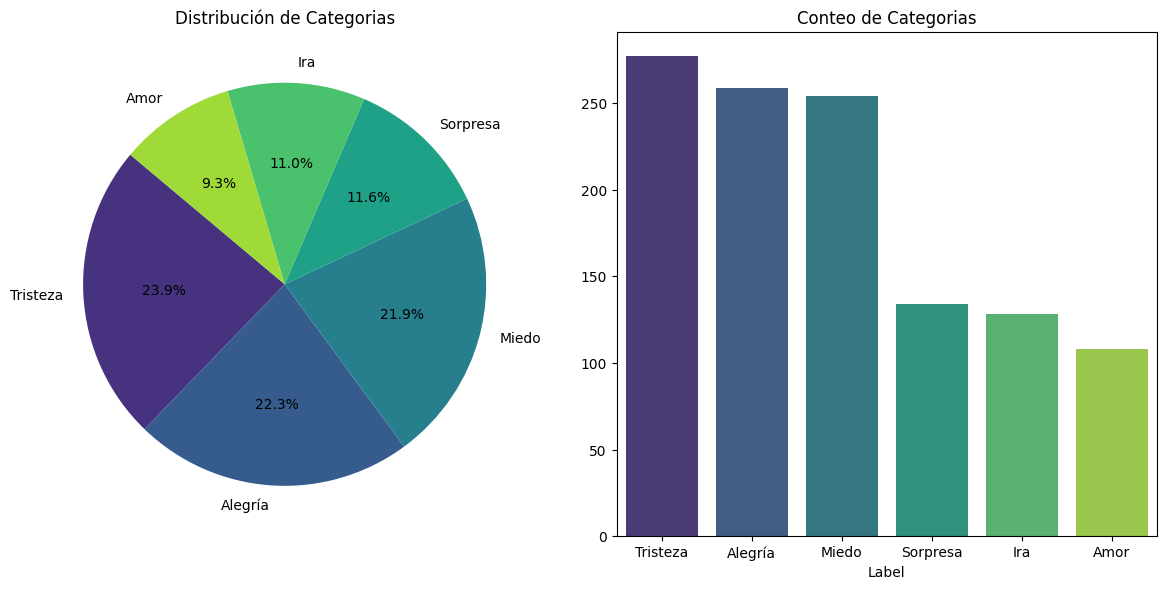

In [ ]:
# Value Count Of Label
count = df['Label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribución de Categorias')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Conteo de Categorias')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Visualización de Datos</p>

In [ ]:
# Make Seperate Data Set to Visualize text
# Tristeza
df_sadness = df[df['Label']=='Tristeza']
# Alegría
df_joy = df[df['Label']=='Alegría']
# Amor
df_love = df[df['Label']=='Amor']
# Ira
df_anger = df[df['Label']=='Ira']
# Miedo
df_fear = df[df['Label']=='Miedo']
# Sorpresa
df_surprise = df[df['Label']=='Sorpresa']

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Nube de palabras</p>

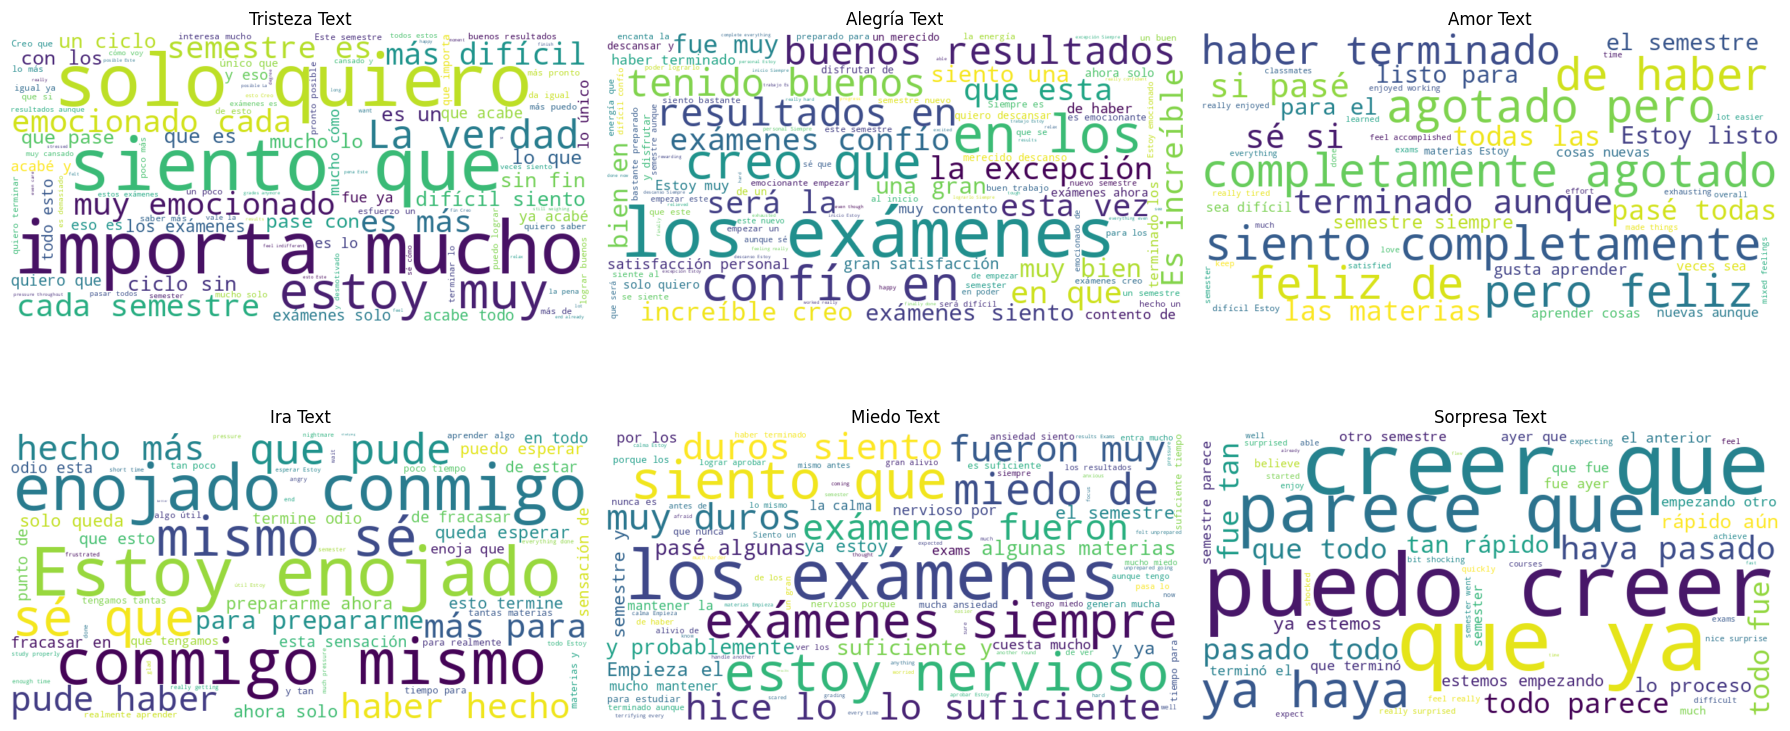

In [ ]:
# Combine text from different categories
combined_sadness_text = ' '.join(df_sadness['Text'])
combined_joy_text = ' '.join(df_joy['Text'])
combined_love_text = ' '.join(df_love['Text'])
combined_anger_text = ' '.join(df_anger['Text'])
combined_fear_text = ' '.join(df_fear['Text'])
combined_surprise_text = ' '.join(df_surprise['Text'])

# Create word clouds
sadness_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_sadness_text)
joy_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_joy_text)
love_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_love_text)
anger_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_anger_text)
fear_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_fear_text)
surprise_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_surprise_text)

# Plot the word clouds
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(sadness_wordcloud, interpolation='bilinear')
plt.title('Tristeza Text')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(joy_wordcloud, interpolation='bilinear')
plt.title('Alegría Text')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(love_wordcloud, interpolation='bilinear')
plt.title('Amor Text')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(anger_wordcloud, interpolation='bilinear')
plt.title('Ira Text')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(fear_wordcloud, interpolation='bilinear')
plt.title('Miedo Text')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(surprise_wordcloud, interpolation='bilinear')
plt.title('Sorpresa Text')
plt.axis('off')

plt.tight_layout()
plt.show()

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Codificación de etiqueta</p>

In [ ]:
# Now Unrename Label again
df['Label'] = df['Label'].replace('Tristeza',0)
df['Label'] = df['Label'].replace('Alegría',1)
df['Label'] = df['Label'].replace('Amor',2)
df['Label'] = df['Label'].replace('Ira',3)
df['Label'] = df['Label'].replace('Miedo',4)
df['Label'] = df['Label'].replace('Sorpresa',5)

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Procesamiento de Texto</p>

- Se Utiliza una expresión regular para eliminar URLs de los datos de texto.
- Utiliza una expresión regular para eliminar cualquier carácter especial y signos de puntuación del texto.
- Utiliza una expresión regular para eliminar espacios en blanco adicionales y reemplazarlos por un solo espacio.
- Utiliza una expresión regular para eliminar cualquier valor numérico del texto.
- Convierte todo el texto a minúsculas para asegurar la consistencia.
- Elimina palabras vacías comunes en inglés, como "the," "is," "and," etc., utilizando la lista de palabras vacías de NLTK.
- Utiliza una expresión regular para eliminar cualquier carácter no alfanumérico del texto.

En general, se aplica filtros para limpiar y normalizar los datos de texto, eliminando ruido y asegurando que los datos adecuados para análisis o modelado.

In [ ]:
# Import Basis Needed Libaries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources (uncomment the following line if not already downloaded)?
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Quitar Url's</p>

In [ ]:
# Step 1: Remove URLs
df['Text'] = df['Text'].str.replace(r'http\S+', '', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label
0  Estoy muy cansado y desmotivado, no sé cómo vo...      0
1  Empieza el semestre y ya estoy nervioso por lo...      4
2  Estoy listo para el semestre, siempre me gusta...      2
3  Los exámenes fueron muy duros, siento que no h...      4
4  Estoy nervioso porque los exámenes siempre me ...      4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Quitar caracteres especiales</p>

In [ ]:
# Step 2: Remove special characters and punctuation
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label
0  Estoy muy cansado y desmotivado no sé cómo voy...      0
1  Empieza el semestre y ya estoy nervioso por lo...      4
2  Estoy listo para el semestre siempre me gusta ...      2
3  Los exámenes fueron muy duros siento que no hi...      4
4  Estoy nervioso porque los exámenes siempre me ...      4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Quitar espacios en blanco</p>

In [ ]:
# Step 3: Remove extra whitespaces
df['Text'] = df['Text'].str.replace(r'\s+', ' ', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label
0  Estoy muy cansado y desmotivado no sé cómo voy...      0
1  Empieza el semestre y ya estoy nervioso por lo...      4
2  Estoy listo para el semestre siempre me gusta ...      2
3  Los exámenes fueron muy duros siento que no hi...      4
4  Estoy nervioso porque los exámenes siempre me ...      4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Quitar valores numéricos en el texto</p>

In [ ]:
# Step : 4 Remove numeric values
df['Text'] = df['Text'].str.replace(r'\d+', '', regex=True)

# Head
df.head()

,Text,Label
0,Estoy muy cansado y desmotivado no sé cómo voy...,0
1,Empieza el semestre y ya estoy nervioso por lo...,4
2,Estoy listo para el semestre siempre me gusta ...,2
3,Los exámenes fueron muy duros siento que no hi...,4
4,Estoy nervioso porque los exámenes siempre me ...,4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Texto a minúsculas</p>

In [ ]:
# Step 6: Lowercasing
df['Text'] = df['Text'].str.lower()

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label
0  estoy muy cansado y desmotivado no sé cómo voy...      0
1  empieza el semestre y ya estoy nervioso por lo...      4
2  estoy listo para el semestre siempre me gusta ...      2
3  los exámenes fueron muy duros siento que no hi...      4
4  estoy nervioso porque los exámenes siempre me ...      4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Quitar palabras vacias</p>

In [ ]:
# Step 8: Remove stop words
stop = stopwords.words('english')
df["Text"] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Display the first few rows of the DataFrame to verify the changes
df.head()

,Text,Label
0,estoy muy cansado desmotivado sé cómo voy pasa...,0
1,empieza el semestre ya estoy nervioso por los ...,4
2,estoy listo para el semestre siempre gusta apr...,2
3,los exámenes fueron muy duros siento que hice ...,4
4,estoy nervioso porque los exámenes siempre gen...,4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Quitar valores no numéricos</p>

In [ ]:
# Step : 9 Remove non-alphanumeric characters from the 'Text' column
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Display the first few rows of the DataFrame to verify the changes
df.head()

,Text,Label
0,estoy muy cansado desmotivado s cmo voy pasar ...,0
1,empieza el semestre ya estoy nervioso por los ...,4
2,estoy listo para el semestre siempre gusta apr...,2
3,los exmenes fueron muy duros siento que hice l...,4
4,estoy nervioso porque los exmenes siempre gene...,4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Separar en train y test</p>

In [ ]:
X = df['Text']
y = df['Label']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (928,)
X_test shape: (232,)
y_train shape: (928,)
y_test shape: (232,)


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Tokenización y padding</p>

- **Tokenización:** Los datos de texto en X_train y X_test son tokenizados utilizando la clase Tokenizer de Keras. Este paso convierte los datos de texto en secuencias de enteros, donde cada palabra única en el conjunto de datos se asigna a un índice entero único. El parámetro num_words limita el tamaño del vocabulario a las palabras más frecuentes.
- **Padding:** Después de la tokenización, las secuencias en X_train y X_test se rellenan para asegurar una longitud uniforme. Esto se logra utilizando la función pad_sequences, que rellena las secuencias con ceros para que todas tengan la misma longitud (maxlen). El padding se realiza después de las secuencias para asegurar que se preserve el contenido real del texto.
En resumen, el código prepara los datos de texto para su procesamiento y modelado al convertirlos en secuencias tokenizadas y rellenadas, haciéndolos adecuados para su uso en algoritmos de aprendizaje automático como las redes neuronales.

In [ ]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Max Len in X_train_sequences
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 18


In [ ]:
# Perform padding on X_train and X_test sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post',)
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

# Print the padded sequences for X_train and X_test
print("X_train_padded:")
print(X_train_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[ 32   1  45 ... 131  15 132]
 [ 26  59   1 ...   0   0   0]
 [152 195 221 ...   0   0   0]
 ...
 [ 14 236  50 ...   0   0   0]
 [ 14 236  50 ...   0   0   0]
 [204 206 105 ...   0   0   0]]

X_test_padded:
[[ 26  42   1 ... 143   0   0]
 [ 14 292 293 ...   0   0   0]
 [  3   2  67 ...   0   0   0]
 ...
 [  6  13 144 ...   0   0   0]
 [  6 171  19 ...   0   0   0]
 [202 165  44 ...   0   0   0]]


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Entradas</p>

In [ ]:
# Embedding Input Size / Vocabulary Size
input_Size = np.max(X_train_padded) + 1
input_Size

315

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Modelo</p>

Se utiliza GRU Bidireccional, porque varios estudios sugieren que las Unidades Recurrentes Gated Bidireccionales (GRU) son esenciales en las tareas de procesamiento de lenguaje natural y modelado de secuencias debido a su capacidad para capturar dependencias bidireccionales en datos secuenciales. A diferencia de los modelos tradicionales unidireccionales, que solo procesan los datos en una dirección, las GRU bidireccionales procesan secuencias de entrada en ambas direcciones simultáneamente. Las GRU bidireccionales destacan en la captura de dependencias a largo plazo, cuando las tareas requieren de contexto, como el análisis de sentimientos, la traducción automática y el reconocimiento de entidades nombradas. Esta capacidad de procesamiento bidireccional mejora el rendimiento del modelo al capturar relaciones más matizadas dentro de los datos, lo que conduce a una mayor precisión en diversas tareas de modelado de secuencias.

- model = `Sequential()` inicializa un modelo secuencial, permitiendo que se agreguen capas en secuencia.

- Se añade la capa Embedding al modelo. Esta capa es responsable de convertir los enteros de entrada (cada uno representando un índice de palabra) en vectores densos de tamaño fijo. Esta capa es esencial para manejar datos textuales.

- A continuación, se agrega una capa de `Dropout` con una tasa de abandono del 0.5. Las capas `Dropout` ayudan a prevenir el sobreajuste al establecer aleatoriamente una fracción de las unidades de entrada en cero durante el entrenamiento.

- Se añaden dos capas GRU Bidireccionales de forma secuencial. Las capas bidireccionales procesan la secuencia de entrada en ambas direcciones, lo que permite al modelo capturar información de los estados pasados y futuros. El argumento `return_sequences=True` asegura que se devuelvan las secuencias de salida para cada paso de tiempo.

- Se añade una capa de `BatchNormalization` para normalizar las activaciones de la capa anterior en cada lote, lo que facilita un entrenamiento más rápido y estable.

- Se agrega otra capa GRU Bidireccional para capturar las dependencias bidireccionales de manera más efectiva.

- La capa final Dense con 6 unidades (para 6 clases) y la función de activación softmax se añade como capa de salida para la clasificación multiclase.

- El modelo se compila con el `optimizador Adam`, la función de pérdida sparse categorical crossentropy, y la métrica de precisión como evaluación.

- `model.summary()` imprime el resumen del modelo, mostrando la arquitectura y los detalles de los parámetros.

In [ ]:
# Define the model
model = Sequential()

# Add embedding layer
model.add(Embedding(input_dim=input_Size, output_dim=50, input_length=maxlen))

# Dropout
model.add(Dropout(0.5))

# Add Bidirectional LSTM layer
model.add(Bidirectional(GRU(120, return_sequences=True)))
model.add(Bidirectional(GRU(64, return_sequences=True)))

#Batch Normalization
model.add(BatchNormalization())

# Add Bidirectional GRU layer
model.add(Bidirectional(GRU(64)))

# Add output layer
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_10 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_11 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Model Fitting</p>

In [ ]:
# Model Train
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=1500, validation_data=(X_test_padded, y_test))

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.1433 - loss: 1.8200 - val_accuracy: 0.5647 - val_loss: 1.7775
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.5172 - loss: 1.5034 - val_accuracy: 0.6810 - val_loss: 1.7644
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.6843 - loss: 1.2580 - val_accuracy: 0.7371 - val_loss: 1.7501
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.7780 - loss: 1.0150 - val_accuracy: 0.8448 - val_loss: 1.7328
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8481 - loss: 0.7778 - val_accuracy: 0.9052 - val_loss: 1.7112


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Visualizing Results</p>

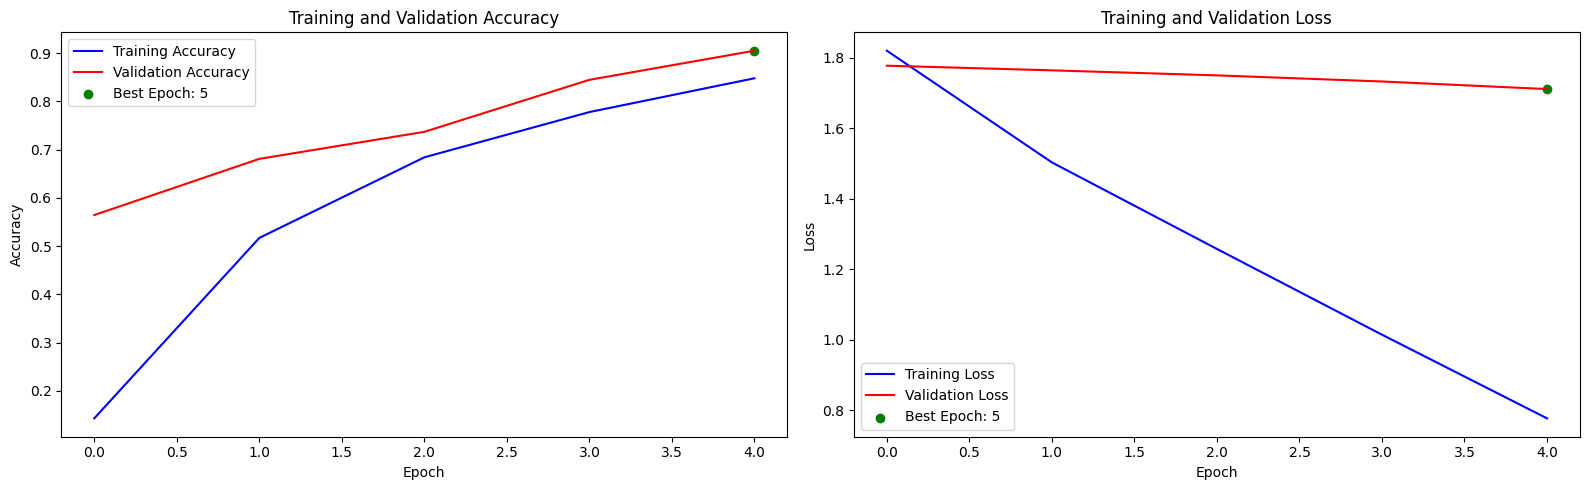

In [ ]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()


# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Test Accuracy</p>

In [ ]:
# Evaluate Test Data
model.evaluate(X_test_padded, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8976 - loss: 1.7129


[1.711235761642456, 0.9051724076271057]

In [ ]:
# Predictions On Test For Confustion Matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_padded)
y_pred = np.argmax(y_pred, axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


<Axes: >

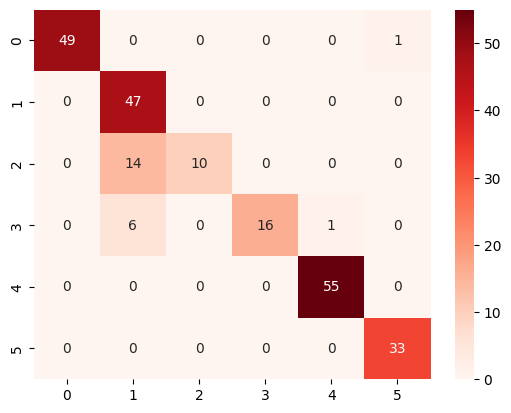

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

In [ ]:
#!pip install transformers datasets torch scikit-learn deep_translator


In [ ]:
# Load Data
df = pd.read_csv('/content/emotion_dataset_combined_english.csv', sep=';', on_bad_lines='skip') # Changed the separator to ';' and skip bad lines
df.head()
df['Text'] = df['Text'].str.lower()

In [ ]:
# Instalar las bibliotecas necesarias si es que no están instaladas
!pip install transformers datasets torch scikit-learn

from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers import MarianMTModel, MarianTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# 1. Cargar el modelo y tokenizador para traducción de español a inglés
model_name_en_to_es = 'Helsinki-NLP/opus-mt-en-es'
model_name_es_to_en = 'Helsinki-NLP/opus-mt-es-en'

tokenizer_en_to_es = MarianTokenizer.from_pretrained(model_name_en_to_es)
model_en_to_es = MarianMTModel.from_pretrained(model_name_en_to_es)

tokenizer_es_to_en = MarianTokenizer.from_pretrained(model_name_es_to_en)
model_es_to_en = MarianMTModel.from_pretrained(model_name_es_to_en)

# Función para traducir de inglés a español
def translate_en_to_es(Text):
    inputs = tokenizer_en_to_es(Text, return_tensors="pt", padding=True)
    translated = model_en_to_es.generate(**inputs)
    return [tokenizer_en_to_es.decode(t, skip_special_tokens=True) for t in translated][0]

# Función para traducir de español a inglés
def translate_es_to_en(Text):
    inputs = tokenizer_es_to_en(Text, return_tensors="pt", padding=True)
    translated = model_es_to_en.generate(**inputs)
    return [tokenizer_es_to_en.decode(t, skip_special_tokens=True) for t in translated][0]

# 2. Cargar dataset y preprocesar
# Cargar un dataset de ejemplo etiquetado con emociones (Asegúrate de tener un dataset etiquetado previamente)
# El dataset debe tener al menos dos columnas: 'text' y 'label'
df = pd.read_csv('/content/emotion_dataset_combined_english.csv', sep=';')  # Cargar tu dataset aquí, especifica el separador
X = df['Text'] # Access the correct column name
y = df['Etiqueta']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# 3. Tokenización usando BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=128)

# 4. Crear el Dataset para PyTorch
class EmotionDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Preparar datasets de entrenamiento y prueba
train_dataset = EmotionDataset(train_encodings, y_train.tolist())
test_dataset = EmotionDataset(test_encodings, y_test.tolist())

# 5. Definir el modelo BERT
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)
optimizer = AdamW(model.parameters(), lr=3e-5)

# 6. Entrenar el modelo
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

model.train()
for epoch in range(5):  # Cambiar el número de épocas según sea necesario
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

print("Entrenamiento completado.")

# 7. Evaluación del modelo
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

model.eval()
all_preds = []
all_labels = []

for batch in test_loader:
    input_ids = batch['input_ids']
    attention_mask = batch['attention_mask']
    labels = batch['labels']

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)

    all_preds.extend(preds.tolist())
    all_labels.extend(labels.tolist())

# Mostrar el reporte de clasificación
print(classification_report(all_labels, all_preds, target_names=['Tristeza', 'Alegría', 'Amor', 'Ira', 'Miedo', 'Sorpresa']))

# 8. Predicción con traducción y el modelo entrenado
def predict_emotion(text, lang='es'):
    # Traducir si el texto no está en inglés
    if lang == 'es':
        text = translate_es_to_en(text)
    elif lang == 'en':
        text = text
    else:
        raise ValueError("El idioma debe ser 'es' para español o 'en' para inglés.")

    encodings = tokenizer([text], truncation=True, padding=True, max_length=128)
    input_ids = torch.tensor(encodings['input_ids'])
    attention_mask = torch.tensor(encodings['attention_mask'])

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)

    emotion_labels = ['Tristeza', 'Alegría', 'Amor', 'Ira', 'Miedo', 'Sorpresa']
    return emotion_labels[preds.item()]

# Probar con un nuevo texto en español
new_text_es = "Me siento muy estresado con los exámenes."
predicted_emotion_es = predict_emotion(new_text_es, lang='es')
print(f'La emoción predicha es: {predicted_emotion_es}')

# Probar con un nuevo texto en inglés
new_text_en = "I am very excited about the project."
predicted_emotion_en = predict_emotion(new_text_en, lang='en')
print(f'La emoción predicha es: {predicted_emotion_en}')


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


X_train shape: (488,)
X_test shape: (122,)
y_train shape: (488,)
y_test shape: (122,)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Entrenamiento completado.
              precision    recall  f1-score   support

    Tristeza       0.93      1.00      0.96        26
     Alegría       0.96      0.96      0.96        26
        Amor       1.00      1.00      1.00        12
         Ira       1.00      1.00      1.00        17
       Miedo       1.00      0.97      0.98        29
    Sorpresa       1.00      0.92      0.96        12

    accuracy                           0.98       122
   macro avg       0.98      0.97      0.98       122
weighted avg       0.98      0.98      0.98       122

La emoción predicha es: Tristeza
La emoción predicha es: Miedo


In [ ]:
# Probar con un nuevo texto en español
new_text_es = "Estoy un poco indiferente. No soy muy fan de la rutina universitaria, pero es algo que debo hacer."
predicted_emotion_es = predict_emotion(new_text_es, lang='es')
print(f'La emoción predicha es: {predicted_emotion_es}')

# Probar con un nuevo texto en inglés
new_text_en = "I'm a bit indifferent. I'm not a big fan of the university routine, but it's something I have to do."
predicted_emotion_en = predict_emotion(new_text_en, lang='en')
print(f'La emoción predicha es: {predicted_emotion_en}')


La emoción predicha es: Tristeza
La emoción predicha es: Tristeza


In [ ]:
# Probar con un nuevo texto en español
new_text_es = "Hoy me siento muy desanimado, no logro avanzar en mis estudios y todo parece salir mal."
predicted_emotion_es = predict_emotion(new_text_es, lang='es')
print(f'La emoción predicha es: {predicted_emotion_es}')

# Probar con un nuevo texto en español
new_text_es = "Estoy muy feliz egre porque hoy entendí todo lo que vimos en la clase, ¡me siento genial!"
predicted_emotion_es = predict_emotion(new_text_es, lang='es')
print(f'La emoción predicha es: {predicted_emotion_es}')

# Probar con un nuevo texto en español
new_text_es = "Aprecio muchísimo el apoyo que me brindan mis compañeros, me hacen sentir valorado."
predicted_emotion_es = predict_emotion(new_text_es, lang='es')
print(f'La emoción predicha es: {predicted_emotion_es}')

# Probar con un nuevo texto en español
new_text_es = "Me enojé tanto porque el sistema falló y no me dejó enviar el proyecto a tiempo."
predicted_emotion_es = predict_emotion(new_text_es, lang='es')
print(f'La emoción predicha es: {predicted_emotion_es}')

# Probar con un nuevo texto en español
new_text_es = "Tengo miedo de no estar preparado para el examen, siento que voy a fallar."
predicted_emotion_es = predict_emotion(new_text_es, lang='es')
print(f'La emoción predicha es: {predicted_emotion_es}')

# Probar con un nuevo texto en español
new_text_es = "¡Qué sorpresa tan grande! No puedo creer que aprobé la materia más difícil del semestre."
predicted_emotion_es = predict_emotion(new_text_es, lang='es')
print(f'La emoción predicha es: {predicted_emotion_es}')




La emoción predicha es: Tristeza
La emoción predicha es: Tristeza
La emoción predicha es: Miedo
La emoción predicha es: Alegría
La emoción predicha es: Tristeza
La emoción predicha es: Alegría


In [ ]:

# Probar con un nuevo texto en inglés
new_text_en = "I feel really down today, nothing seems to be going right in my studies."
predicted_emotion_en = predict_emotion(new_text_en, lang='en')
print(f'La emoción predicha es: {predicted_emotion_en}')

# Probar con un nuevo texto en inglés
new_text_en = "I got really frustrated because the system wouldn't let me submit my project on time."
predicted_emotion_en = predict_emotion(new_text_en, lang='en')
print(f'La emoción predicha es: {predicted_emotion_en}')

# Probar con un nuevo texto en inglés
new_text_en = "I'm really worried about the final exams, I don't feel prepared at all."
predicted_emotion_en = predict_emotion(new_text_en, lang='en')
print(f'La emoción predicha es: {predicted_emotion_en}')

# Probar con un nuevo texto en inglés
new_text_en = "I can't believe I passed the hardest subject of the semester!"
predicted_emotion_en = predict_emotion(new_text_en, lang='en')
print(f'La emoción predicha es: {predicted_emotion_en}')


NameError: name 'predict_emotion' is not defined

Accuracy: 0.9754
Precision: 0.9766
Recall: 0.9754
F1-score: 0.9755


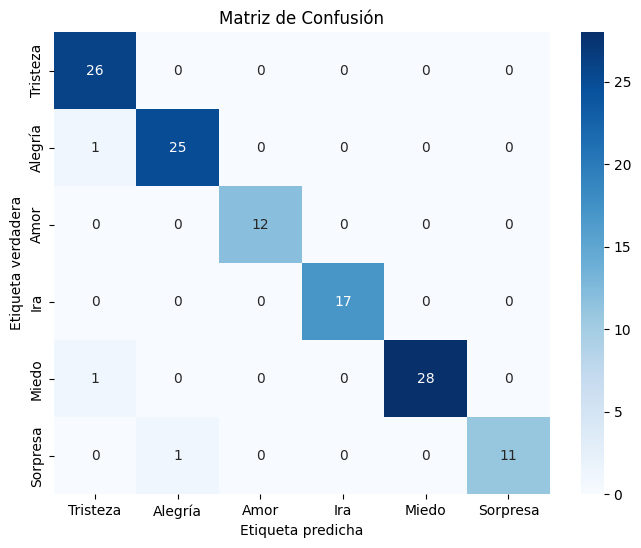

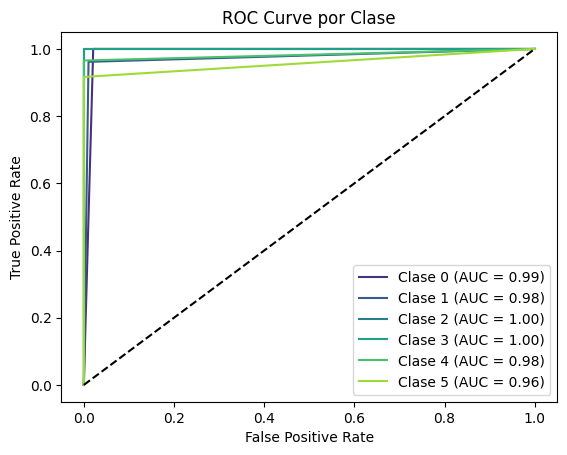

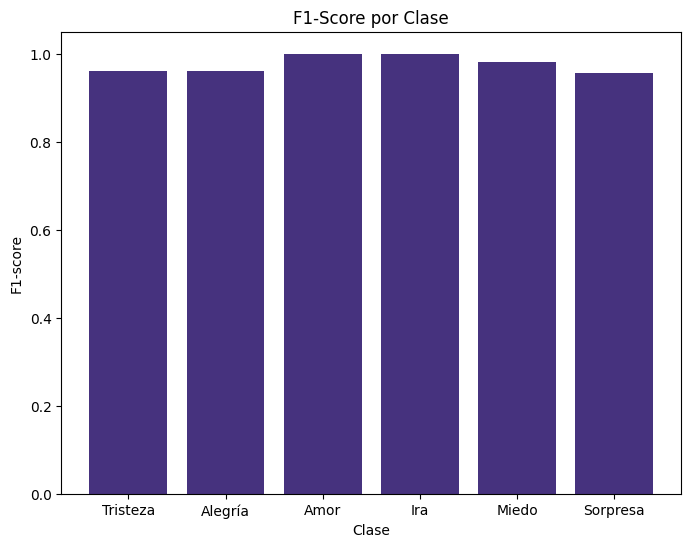

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# 1. Calcular las métricas
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# 2. Mostrar la matriz de confusión
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Tristeza', 'Alegría', 'Amor', 'Ira', 'Miedo', 'Sorpresa'], yticklabels=['Tristeza', 'Alegría', 'Amor', 'Ira', 'Miedo', 'Sorpresa'])
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.show()

# 3. ROC y AUC
# Dado que estamos trabajando con varias clases, se puede calcular el ROC para cada clase
from sklearn.preprocessing import label_binarize

# Binarizar las etiquetas para calcular ROC/AUC para cada clase
all_labels_bin = label_binarize(all_labels, classes=[0, 1, 2, 3, 4, 5])
all_preds_bin = label_binarize(all_preds, classes=[0, 1, 2, 3, 4, 5])

# ROC curve y AUC por clase
for i in range(6):  # 6 clases
    fpr, tpr, _ = roc_curve(all_labels_bin[:, i], all_preds_bin[:, i])
    auc_score = roc_auc_score(all_labels_bin[:, i], all_preds_bin[:, i])

    plt.plot(fpr, tpr, label=f'Clase {i} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve por Clase')
plt.legend()
plt.show()

# 4. Gráfica de F1-score por clase
f1_scores_per_class = f1_score(all_labels, all_preds, average=None)

plt.figure(figsize=(8, 6))
plt.bar(['Tristeza', 'Alegría', 'Amor', 'Ira', 'Miedo', 'Sorpresa'], f1_scores_per_class)
plt.title('F1-Score por Clase')
plt.ylabel('F1-score')
plt.xlabel('Clase')
plt.show()
